In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000713676"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000713676
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,"PNC FINANCIAL SERVICES GROUP, INC."
Ticker,PNC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,61.0,5.983623e+01,2.254401e+01,2.501000e+01,4.200000e+01,6.152000e+01,7.964000e+01,9.847000e+01
interest income,61.0,2.257213e+09,7.635939e+08,6.580000e+08,1.619000e+09,2.453000e+09,2.752000e+09,3.734000e+09
net income,61.0,8.158197e+08,4.177396e+08,-2.480000e+08,4.230000e+08,9.250000e+08,1.073000e+09,2.091000e+09
net interest income,62.0,1.754097e+09,7.562529e+08,3.140000e+08,8.847500e+08,2.140000e+09,2.284750e+09,2.526000e+09
provision for loan losses,62.0,2.223226e+08,2.823026e+08,-2.700000e+07,5.400000e+07,1.190000e+08,2.340000e+08,1.087000e+09
total revenue,62.0,3.305097e+09,1.221727e+09,4.890000e+08,1.799250e+09,3.785500e+09,4.032750e+09,6.705000e+09


# Plots

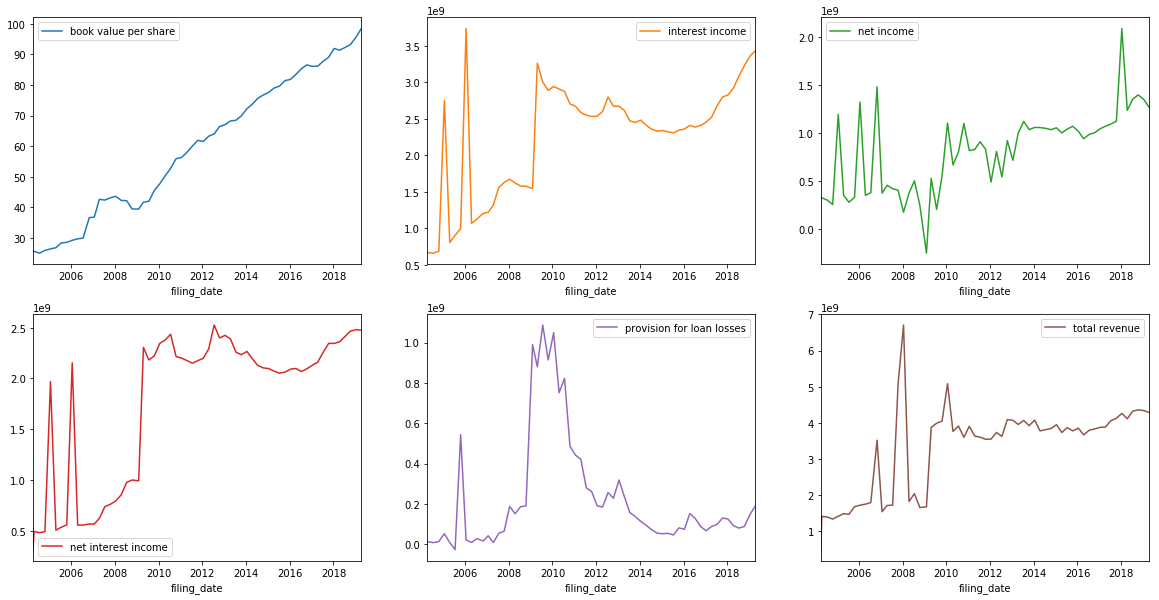

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type         message
cik        item                                                 
0000713676 book value per share  2003Q4  missing  Missing period
           interest income       2003Q4  missing  Missing period
           net income            2003Q4  missing  Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()